In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# Load your data 
data = pd.read_stata('/Users/af955/Library/CloudStorage/OneDrive-YaleUniversity/ELSA_Databases/ecg_age.dta')

# Define models with their respective variables
models = {
    "Model 1": ["idadea", "sex"],
    "Model 2": ["delta_ecg", "idadea", "sex"],
    "Model 3": ["who_cvdx_br"],
    "Model 4": ["delta_ecg", "who_cvdx_br"]
}

<ipython-input-2-6d9fcdad4b01>:3: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data = pd.read_stata('/Users/af955/Library/CloudStorage/OneDrive-YaleUniversity/ELSA_Databases/ecg_age.dta')


In [3]:
# Initialize results dictionary
results = {}

for model_name, predictors in models.items():
    # Drop rows with NaNs in predictor and target variables
    model_data = data[predictors + ['s_deratero']].dropna()

    # Split data into features and target
    X = model_data[predictors]
    y = model_data['s_deratero']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Verify again that no NaNs are left in X_train and y_train
    if X_train.isnull().values.any() or y_train.isnull().values.any():
        raise ValueError(f"{model_name} still contains NaN values after cleanup.")
    
    # Initialize and train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        "Mean Squared Error": mse,
        "R^2 Score": r2,
        "Mean Absolute Error": mae,
        "Predicted": y_pred,
        "Observed": y_test.values
    }
    
    print(f"{model_name} trained successfully.")

Model 1 trained successfully.
Model 2 trained successfully.
Model 3 trained successfully.
Model 4 trained successfully.


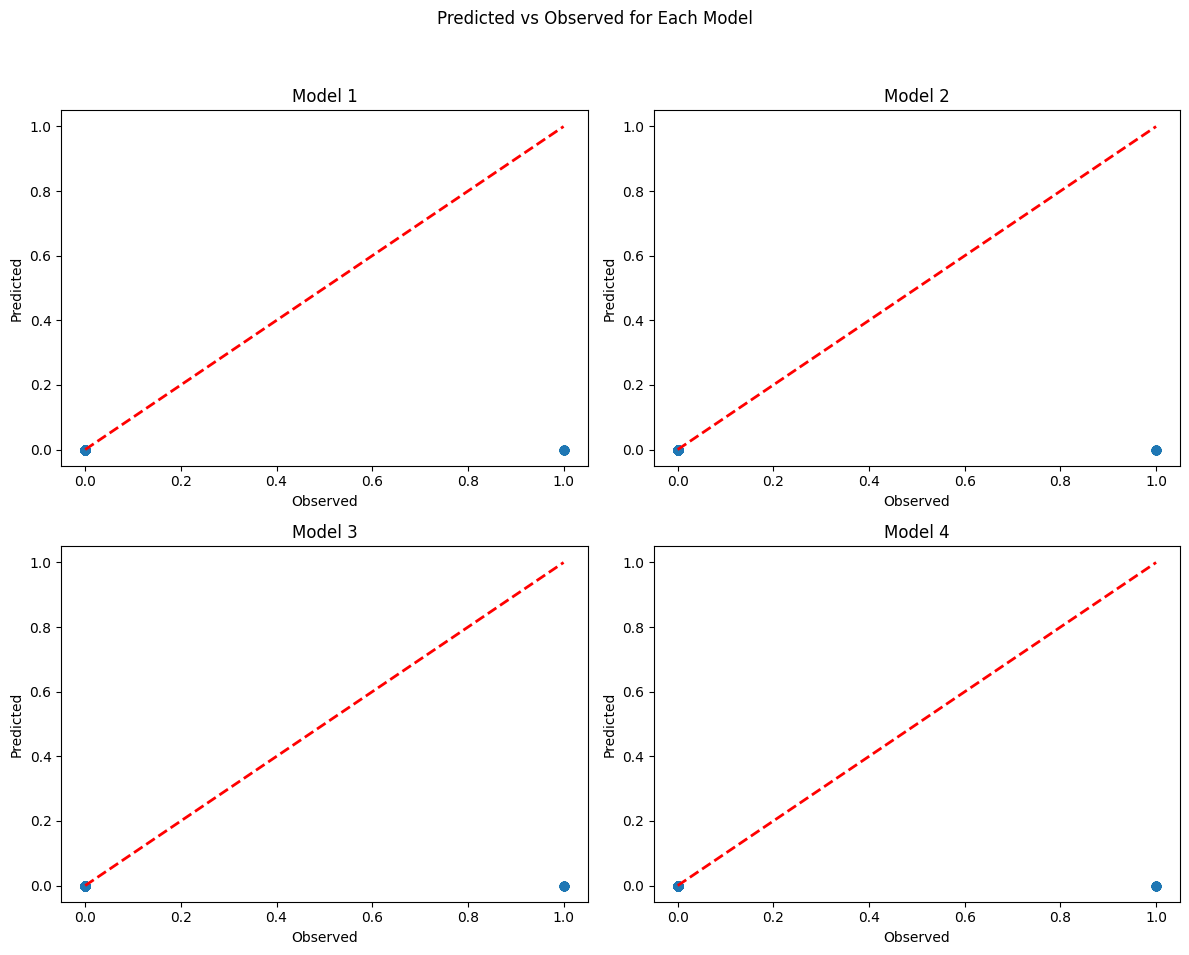

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Predicted vs Observed for Each Model')

for i, (model_name, result) in enumerate(results.items()):
    ax = axes[i // 2, i % 2]  # Corrected line without incomplete input
    ax.scatter(result["Observed"], result["Predicted"], alpha=0.6)
    ax.plot([min(result["Observed"]), max(result["Observed"])],
            [min(result["Observed"]), max(result["Observed"])],
            'r--', lw=2)
    ax.set_title(f"{model_name}")
    ax.set_xlabel("Observed")
    ax.set_ylabel("Predicted")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [6]:
# Display results summary
results_df = pd.DataFrame(results).T
results_df = results_df[["Mean Squared Error", "R^2 Score", "Mean Absolute Error"]]
print("Model Comparison Summary:")
print(results_df)

Model Comparison Summary:
        Mean Squared Error R^2 Score Mean Absolute Error
Model 1           0.015579 -0.015825            0.015579
Model 2           0.015579 -0.015825            0.015579
Model 3           0.013064 -0.013237            0.013064
Model 4           0.013064 -0.013237            0.013064
